In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Position'
]

In [3]:
FF18 = pd.read_csv('data/Dataset.csv')
FF18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 50 columns):
Unnamed: 0          13500 non-null int64
Name                13500 non-null object
Age                 13500 non-null int64
Photo               13500 non-null object
Nationality         13500 non-null object
Flag                13500 non-null object
Overall             13500 non-null int64
Potential           13500 non-null int64
Club                13215 non-null object
Club Logo           13500 non-null object
Value               13500 non-null object
Wage                13500 non-null object
Special             13500 non-null int64
Position            13500 non-null object
Unnamed: 0_y        13485 non-null float64
Acceleration        13500 non-null object
Aggression          13500 non-null object
Agility             13500 non-null object
Balance             13500 non-null object
Ball Control        13500 non-null object
Composure           13475 non-null object
Crossing     

In [4]:
FF18.head(1).T

,0
Unnamed: 0,0
Name,T. Pukki
Age,28
Photo,https://cdn.sofifa.org/players/4/19/190362.png
Nationality,Finland
Flag,https://cdn.sofifa.org/flags/17.png
Overall,76
Potential,76
Club,Norwich City
Club Logo,https://cdn.sofifa.org/teams/2/light/1792.png


In [5]:
df = pd.DataFrame(FF18, columns=interesting_columns)
# df['Preferred Positions'] = df['Preferred Positions'].astype('str')
# df['Position'] = df['Preferred Positions'].str.split().str[0]
FF18 = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FF18.head(1).T

,0
Name,T. Pukki
Age,28
Nationality,Finland
Overall,76
Potential,76
Club,Norwich City
Position,ST|CF
Value,€8M
Wage,€32K


In [6]:
FF18.fillna(value=0, inplace=True)
FF18.dropna(inplace=True)

In [7]:
FF18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13500 entries, 0 to 13499
Data columns (total 9 columns):
Name           13500 non-null object
Age            13500 non-null int64
Nationality    13500 non-null object
Overall        13500 non-null int64
Potential      13500 non-null int64
Club           13500 non-null object
Position       13500 non-null object
Value          13500 non-null object
Wage           13500 non-null object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


In [8]:
# Supporting function for converting string values into numbers
import re
def str2number(amount):
    if amount[-1] == 'M':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000000
    elif amount[-1] == 'K':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000
    else:
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)
    
FF18['ValueNum'] = FF18['Value'].apply(lambda x: str2number(x))
FF18['WageNum'] = FF18['Wage'].apply(lambda x: str2number(x))

In [9]:
FF18.head(1).T

,0
Name,T. Pukki
Age,28
Nationality,Finland
Overall,76
Potential,76
Club,Norwich City
Position,ST|CF
Value,€8M
Wage,€32K
ValueNum,8e+06


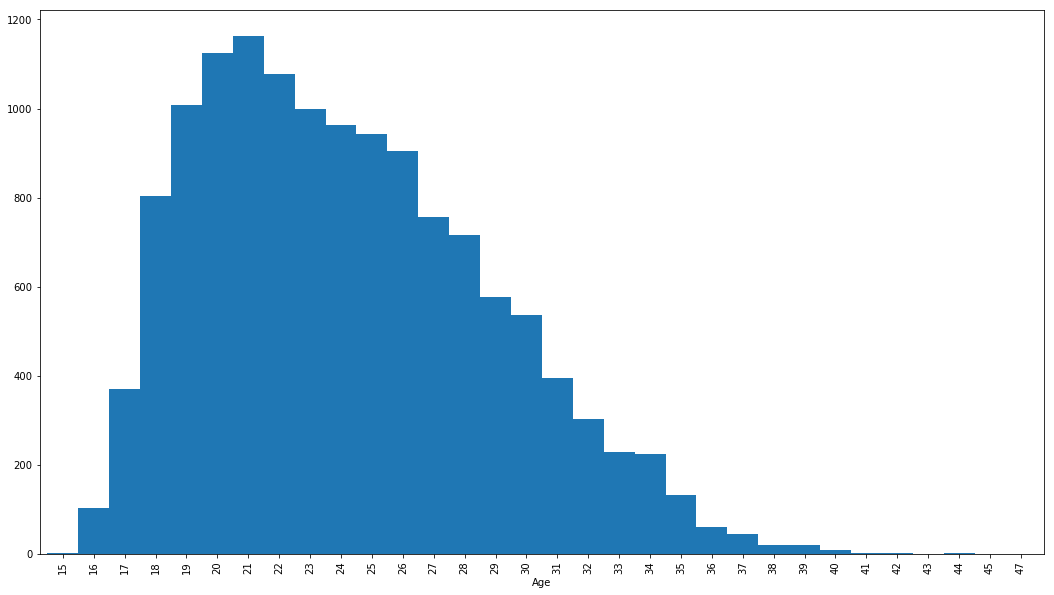

In [10]:
plt.figure(figsize=(18, 10))
df.groupby('Age')['Age'].count().plot(kind='bar', width=1)

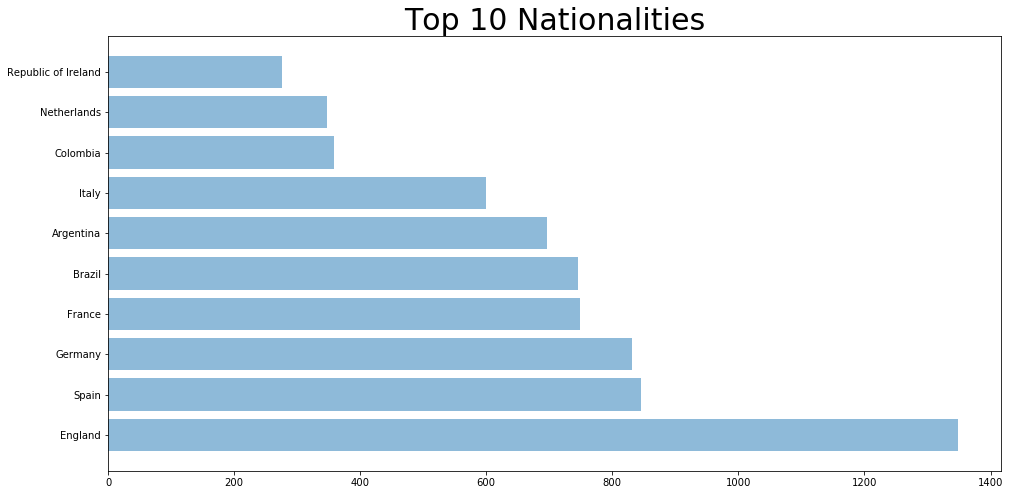

In [11]:
plt.figure(figsize=(16,8))
# func = lambda x : np.where(x < 0, x.mean(), x)
# def top_value_count(x, n=5):
#     return x.value_counts().head(n)
teams = df.groupby('Nationality')['Name'].count().reset_index()
teams = teams.sort_values('Name', ascending=False).head(10)
plt.barh(teams['Nationality'], teams['Name'], align='center', alpha=0.5)
plt.title('Top 10 Nationalities', fontsize=30)
plt.show()

In [12]:
def get_best_squad_n(formation, nationality, measurement = 'Overall', teams = ''):
    FF18_copy = FF18.copy()
    FF18_copy = FF18_copy[FF18_copy['Nationality'] == nationality]
    if len(teams) > 0:
        FF18_copy.loc[[FF18_copy[FF18_copy.Club.isin(teams.Club)]]]
    store = []
    for i in formation:
        store.append([
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].max(),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        FF18_copy.drop(FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [13]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall') 
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    return summary

In [14]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [15]:
FF18[df['Position'].isnull()|df['Name'].isnull()|df['Age'].isnull()|df['Club'].isnull()|df['Value'].isnull()|df['Wage'].isnull()].head(3)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage,ValueNum,WageNum
168,I. Hagi,19,Romania,72,85,0,CAM|LW,€0,€0,0.0,0.0
545,W. Barrios,24,Colombia,78,83,0,CDM|CM,€0,€0,0.0,0.0
744,D. Man,19,Romania,70,82,0,RW|CF,€0,€0,0.0,0.0


In [16]:
FF18.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage,ValueNum,WageNum
0,T. Pukki,28,Finland,76,76,Norwich City,ST|CF,€8M,€32K,8000000.0,32000.0
1,D. Upamecano,19,France,77,88,RB Leipzig,CB,€13M,€18K,13000000.0,18000.0
2,M. Mount,19,England,74,86,Derby County,CAM|CM|On Loan,€10M,€34K,10000000.0,34000.0
3,Wesley,21,Brazil,78,85,Club Brugge KV,ST,€15M,€21K,15000000.0,21000.0
4,T. Abraham,20,England,75,85,Aston Villa,ST|On Loan,€11M,€64K,11000000.0,64000.0


In [17]:
for contry in teams['Nationality']:
    c = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, [contry])), columns = ['Nationality', 'Squad', 'Overall']) 
    print(c)
    rating_433_Overall, best_list_433_Overall = get_best_squad_n(squad_433_strict, contry, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_433_Overall))
    print(best_list_433_Overall)


  Nationality    Squad Overall
0     England    3-4-3   83.36
1     England    4-4-2   82.55
2     England  4-3-1-2   82.82
3     England    4-3-3   83.55
4     England  4-2-3-1   83.55
-Overall-
Average rating: 83.5
        Position         Player Overall  Age                Club    Value    Wage
              GK      T. Heaton      80   32             Burnley    €8.5M    €48K
              RB      K. Walker      84   28     Manchester City   €24.5M   €165K
              CB      J. Stones      83   24     Manchester City   €28.5M   €125K
  FIFA 12|CB|CDM        L. King      82   30   Tottenham Hotspur       €0      €0
              LB        L. Shaw      81   22   Manchester United     €19M   €105K
          CAM|CM        D. Alli      85   22   Tottenham Hotspur   €51.5M   €125K
       RW|CAM|CF     J. Lingard      82   25   Manchester United   €26.5M   €150K
          CDM|CM   J. Henderson      82   28           Liverpool     €18M   €125K
           RW|LW    R. Sterling      87   23 

  Nationality    Squad Overall
0    Colombia    3-4-3   79.27
1    Colombia    4-4-2   79.91
2    Colombia  4-3-1-2   79.36
3    Colombia    4-3-3   79.73
4    Colombia  4-2-3-1   79.64
-Overall-
Average rating: 79.7
              Position         Player Overall  Age                     Club    Value    Wage
            GK|On Loan      D. Ospina      79   29                   Napoli    €8.5M    €80K
                    RB       S. Arias      79   26          Atlético Madrid     €12M    €50K
                    CB     D. Sánchez      83   22        Tottenham Hotspur   €28.5M    €93K
            CB|On Loan     J. Murillo      80   26             FC Barcelona   €15.5M    €38K
             LWB|LM|LB      J. Mojica      78   25                Girona FC   €10.5M    €28K
                CDM|CM     W. Barrios      78   24                        0       €0      €0
                CAM|CF    J. Quintero      80   25              River Plate   €18.5M    €29K
  FIFA 18|RM|ST|CAM|RW       Y. Chará  